# CS 109A/AC 209A/STAT 121A Data Science: Final Project
**Harvard University**<br>
**Fall 2016**<br>
**Instructors:** W. Pan, P. Protopapas, K. Rader<br>
**Members: ** Shawn Pan, Xinyuan (Amy) Wang, Ming-long Wu

## Remark - 041_preprocessing ##

- Cleaning missing price entries
- Check y (price) distribution
- Check lattitude and longitude distribution
- Check missing data in all predictors
- Cleaning entries with missing review scores
- Fill rest of missing values with mean and mod
- Do one-hot encoding of categorical predictors
- Export data_preprocessed.csv


### Load listing data ###

In [14]:
import time
import pandas as pd
import numpy as np
import scipy as sp
from scipy.signal import savgol_filter
from scipy.stats import mode
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import dates
from matplotlib import colors
import matplotlib.dates as mdates
from datetime import datetime
from collections import Counter
from mpl_toolkits.basemap import Basemap
import statsmodels.api as sm
from sklearn import preprocessing
from collections import Counter
%matplotlib inline

In [15]:
# Load listing data
listing = pd.read_csv('../../Data/listings_clean.csv')
print(listing.columns.values)
listing.head()

['id' 'host_since' 'zipcode' 'latitude' 'longitude' 'property_type'
 'room_type' 'accommodates' 'bathrooms' 'bedrooms' 'beds' 'bed_type'
 'guests_included' 'minimum_nights' 'maximum_nights' 'availability_30'
 'availability_60' 'availability_90' 'availability_365' 'number_of_reviews'
 'first_review' 'last_review' 'review_scores_rating'
 'review_scores_accuracy' 'review_scores_cleanliness'
 'review_scores_checkin' 'review_scores_communication'
 'review_scores_location' 'review_scores_value' 'host_listing_count'
 'price']


,id,host_since,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listing_count,price
0,1069266,1926,10022.0,40.756852,-73.964754,0,0,2,1.0,1.0,...,2542.0,86.0,9.0,7.0,9.0,9.0,10.0,9.0,1,160
1,1846722,1625,NaN,40.830599,-73.941014,0,0,10,1.0,3.0,...,2554.0,85.0,8.0,8.0,9.0,8.0,7.0,8.0,2,105
2,2061725,1831,11221.0,40.692189,-73.924120,0,1,2,1.0,1.0,...,2554.0,98.0,10.0,10.0,10.0,10.0,9.0,10.0,4,58
3,44974,953,10011.0,40.734751,-74.002592,0,0,2,1.0,1.0,...,2494.0,96.0,10.0,9.0,10.0,10.0,10.0,9.0,1,185
4,4701675,2479,10011.0,40.745282,-73.997836,0,0,2,1.0,1.0,...,2533.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,195


In [16]:
print('listing size: ' + str(listing.shape))

listing size: (27392, 31)


### Cleaning missing price entries

In [17]:
# Cleaning out some entries
# listing = listing[listing.bedrooms != 0]
# print('listing size after cleaning: ' + str(listing.shape))
# listing = listing[listing.beds != 0]
# print('listing size after cleaning: ' + str(listing.shape))
listing = listing[listing.price != 0]
print('listing size after cleaning: ' + str(listing.shape))
# listing = listing.dropna(axis=0)
# print('listing size after cleaning: ' + str(listing.shape))

listing size after cleaning: (27392, 31)


In [18]:
listing.head(n=5)

,id,host_since,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listing_count,price
0,1069266,1926,10022.0,40.756852,-73.964754,0,0,2,1.0,1.0,...,2542.0,86.0,9.0,7.0,9.0,9.0,10.0,9.0,1,160
1,1846722,1625,NaN,40.830599,-73.941014,0,0,10,1.0,3.0,...,2554.0,85.0,8.0,8.0,9.0,8.0,7.0,8.0,2,105
2,2061725,1831,11221.0,40.692189,-73.924120,0,1,2,1.0,1.0,...,2554.0,98.0,10.0,10.0,10.0,10.0,9.0,10.0,4,58
3,44974,953,10011.0,40.734751,-74.002592,0,0,2,1.0,1.0,...,2494.0,96.0,10.0,9.0,10.0,10.0,10.0,9.0,1,185
4,4701675,2479,10011.0,40.745282,-73.997836,0,0,2,1.0,1.0,...,2533.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,195


### Check distribution of Y

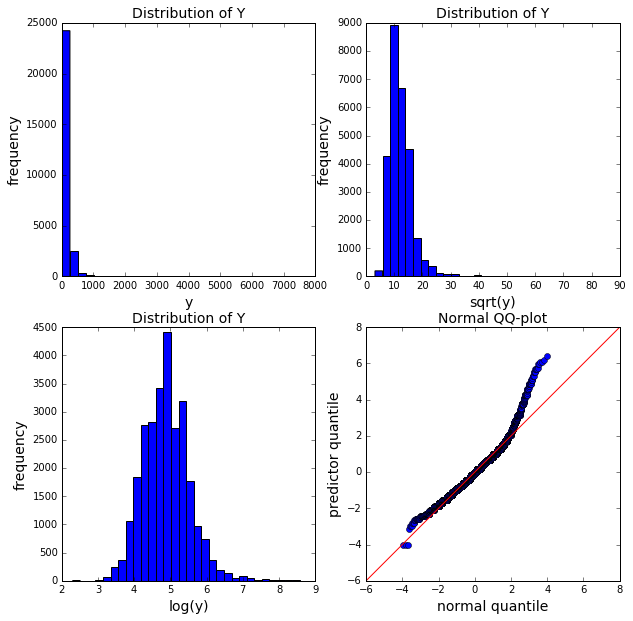

In [19]:
y = listing['price']

# Check normality of y
fig1, ax1 = plt.subplots(2, 2, figsize=(10, 10))
# Plot Y distribution
ax1[0, 0].hist(y, bins = 32, facecolor = 'blue')
ax1[0, 0].set_xlabel('y', fontsize=14)
ax1[0, 0].set_ylabel('frequency', fontsize=14)
ax1[0, 0].set_title('Distribution of Y', fontsize=14)

# Plot Y distribution
ax1[0, 1].hist(np.sqrt(y), bins = 32, facecolor = 'blue')
ax1[0, 1].set_xlabel('sqrt(y)', fontsize=14)
ax1[0, 1].set_ylabel('frequency', fontsize=14)
ax1[0, 1].set_title('Distribution of Y', fontsize=14)

# Plot Y distribution
ax1[1, 0].hist(np.log(y), bins = 32, facecolor = 'blue')
ax1[1, 0].set_xlabel('log(y)', fontsize=14)
ax1[1, 0].set_ylabel('frequency', fontsize=14)
ax1[1, 0].set_title('Distribution of Y', fontsize=14)

# QQ-plot of y
sm.qqplot(np.log(y),ax=ax1[1, 1], fit=True, line='45')
ax1[1, 1].set_xlabel('normal quantile', fontsize=14)
ax1[1, 1].set_ylabel('predictor quantile', fontsize=14)
ax1[1, 1].set_title('Normal QQ-plot', fontsize=14)


### Transformation of y ##
- From above test, we choose to apply log transformation to y.
- Log(y) is symmetric and is closer to normal.

### Check latitude and longitude ##
- These two should be the most important predictors.
- Check their distributions.

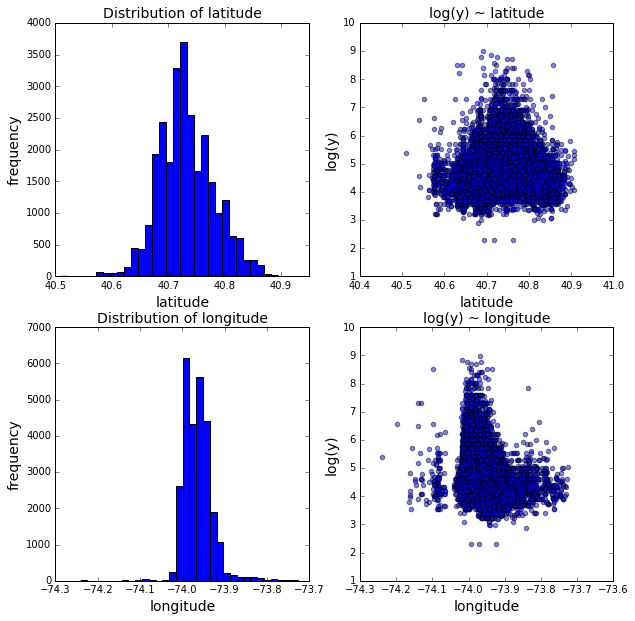

In [20]:
# Examine predictor distribution
fig2, ax2 = plt.subplots(2, 2, figsize=(10, 10))

predictor = listing['latitude']
# Plot latitude distribution
ax2[0, 0].hist(predictor, bins = 32, facecolor = 'blue')
ax2[0, 0].set_xlabel('latitude', fontsize=14)
ax2[0, 0].set_ylabel('frequency', fontsize=14)
ax2[0, 0].set_title('Distribution of latitude', fontsize=14)

# Plot log(y) ~ latitude distribution
ax2[0, 1].scatter(predictor, np.log(y), c='blue', alpha=0.5)
ax2[0, 1].set_xlabel('latitude', fontsize=14)
ax2[0, 1].set_ylabel('log(y)', fontsize=14)
ax2[0, 1].set_title('log(y) ~ latitude', fontsize=14)


predictor = listing['longitude']
# Plot latitude distribution
ax2[1, 0].hist(predictor, bins = 32, facecolor = 'blue')
ax2[1, 0].set_xlabel('longitude', fontsize=14)
ax2[1, 0].set_ylabel('frequency', fontsize=14)
ax2[1, 0].set_title('Distribution of longitude', fontsize=14)

# Plot log(y) ~ latitude distribution
ax2[1, 1].scatter(predictor, np.log(y), c='blue', alpha=0.5)
ax2[1, 1].set_xlabel('longitude', fontsize=14)
ax2[1, 1].set_ylabel('log(y)', fontsize=14)
ax2[1, 1].set_title('log(y) ~ longitude', fontsize=14)

### Deal with missing data
- Check missing data in each predictors

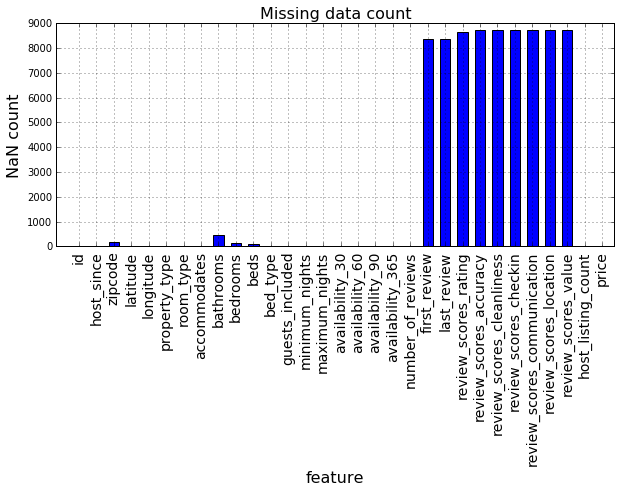

In [21]:
# Count NaN in each column
col_names = listing.columns.values
nan_cnt = np.empty(listing.shape[1])
for idx in range(listing.shape[1]):
    nan_cnt[idx] = sum(np.isnan(listing[col_names[idx]]))

# Bar chart
# Plot weekday average price in 2015
fig3, ax3 = plt.subplots(1, 1, figsize=(10, 4))

x = range(1,listing.shape[1]+1)
width = 0.6
ax3.bar(x, nan_cnt, width)

ax3.set_xlim((0, listing.shape[1]+1))
# ax3.set_ylim((175, 185))

# ax3.set_xticks([i+width/2 for i in x])
ax3.set_xticklabels(col_names)
plt.xticks([i+width/2 for i in x], rotation='vertical', fontsize=14)

ax3.set_xlabel('feature', fontsize=16)
ax3.set_ylabel('NaN count', fontsize=16)
ax3.set_title('Missing data count', fontsize=16)

plt.grid()
plt.show()

### Missing review scores
- There are almost 8000 entries with missing review scores.
- For entries with any missing review score, all scores are missing.

### Fill rest of missing values with mean and mode

In [23]:
# Copy listing1 to df_cleaned
df_cleaned = listing.copy()

#categorical and numerical column names
cate = ['property_type', 'room_type', 'bed_type'] #'zipcode' 
nume = [c for c in df_cleaned.columns.values if c not in cate]

#fill categorical with mode, numerical with rounded mean
df_cleaned[cate] = df_cleaned[cate].apply(lambda x:x.fillna(x.value_counts().index[0]))
df_cleaned[nume] = df_cleaned[nume].apply(lambda x:x.fillna(round(x.mean())))

df_cleaned.head()

,id,host_since,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,host_listing_count,price
0,1069266,1926,10022.0,40.756852,-73.964754,0,0,2,1.0,1.0,...,2542.0,86.0,9.0,7.0,9.0,9.0,10.0,9.0,1,160
1,1846722,1625,10530.0,40.830599,-73.941014,0,0,10,1.0,3.0,...,2554.0,85.0,8.0,8.0,9.0,8.0,7.0,8.0,2,105
2,2061725,1831,11221.0,40.692189,-73.924120,0,1,2,1.0,1.0,...,2554.0,98.0,10.0,10.0,10.0,10.0,9.0,10.0,4,58
3,44974,953,10011.0,40.734751,-74.002592,0,0,2,1.0,1.0,...,2494.0,96.0,10.0,9.0,10.0,10.0,10.0,9.0,1,185
4,4701675,2479,10011.0,40.745282,-73.997836,0,0,2,1.0,1.0,...,2533.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,195


### Do one-hot encoding of categorical predictors

In [24]:
df_expanded = pd.get_dummies(df_cleaned, columns=cate, drop_first=False)
df_expanded.head()

,id,host_since,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,guests_included,...,property_type_4,property_type_5,room_type_0,room_type_1,room_type_2,bed_type_0,bed_type_1,bed_type_2,bed_type_3,bed_type_4
0,1069266,1926,10022.0,40.756852,-73.964754,2,1.0,1.0,1.0,2,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1846722,1625,10530.0,40.830599,-73.941014,10,1.0,3.0,3.0,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2061725,1831,11221.0,40.692189,-73.924120,2,1.0,1.0,2.0,1,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,44974,953,10011.0,40.734751,-74.002592,2,1.0,1.0,1.0,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4701675,2479,10011.0,40.745282,-73.997836,2,1.0,1.0,2.0,1,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [26]:
print df_expanded.shape
df_expanded.columns.values

(27392, 42)


array(['id', 'host_since', 'zipcode', 'latitude', 'longitude',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'host_listing_count', 'price',
       'property_type_0', 'property_type_1', 'property_type_2',
       'property_type_3', 'property_type_4', 'property_type_5',
       'room_type_0', 'room_type_1', 'room_type_2', 'bed_type_0',
       'bed_type_1', 'bed_type_2', 'bed_type_3', 'bed_type_4'], dtype=object)

### Export data_preprocessed.csv

In [27]:
# Save data
df_expanded.to_csv('../../Data/data_preprocessed.csv', index=False)